######data cleaning and EDA
categorical encoding (airline, source, destination) 
######EDA
data viz 
######Feature and target engineering
######ML modeling
######Conclusion --perform testing


In [48]:
! pip3 install seaborn

     |████████████████████████████████| 292 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 55.6 MB 41 kB/s  eta 0:00:012   |▉                               | 1.4 MB 9.0 MB/s eta 0:00:07     |█████████████████▏              | 29.8 MB 4.1 MB/s eta 0:00:07
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/ksah4444/Documents/Group_Project/flights_analysis/data/flights.csv')


In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,NaN,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN,NaN


In [8]:
df.shape

(10683, 13)

In [9]:
##drop unnamed columns
df.drop(['Unnamed: 11'], axis =1, inplace=True)
df.drop(['Unnamed: 12'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Convert dtype of Date_of_Journay, Dep_Time and Arrival_Time to DateTime type**

In [11]:
###convert time to DateTime type
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [13]:
#divide years, months, days of datetime dtype
df['journey_year']=df['Date_of_Journey'].dt.year
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_day']=df['Date_of_Journey'].dt.day

In [14]:
#drop Date_of_Journey
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [15]:
#divide dep_time to two columns: hr and min 
df['dep_hour']=df['Dep_Time'].dt.hour
df['dep_min']=df['Dep_Time'].dt.minute

In [16]:
#drop Dep_time
df.drop(['Dep_Time'], axis=1, inplace=True)

In [17]:
###devide arrival date
df['arrival_year']=df['Arrival_Time'].dt.year
df['arrival_month']=df['Arrival_Time'].dt.month
df['arrival_day']=df['Arrival_Time'].dt.day

In [18]:
##devide arrival time 
df['arrival_hour']=df['Arrival_Time'].dt.hour
df['arrival_min']=df['Arrival_Time'].dt.minute

In [19]:
#drop Arrival_Time
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [20]:
#divide Duration to two columns: hours and mins
duration = list(df["Duration"]) #list Duration so we can spply split() and referencec it 
duration_hours = [] #create empty lists to append later with values from Duration
duration_mins = []



for i in range(len(duration)):
    duration_hours.append(duration[i].split(sep = "h")[0])
    duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])

In [21]:
def get_hour(x):
    if x.find('h') == -1:
        return 0
    return x.split(sep = "h")[0]
def get_min(x):
    if x.find('m') == -1:
        return 0
    return x.split(sep = 'm')[0].split()[-1]

In [22]:
# ##adding duration_hours and duration_mins to df
# df['duration_hours']=duration_hours
# df['duration_mins']=duration_mins

In [23]:
df['duration_hours'] = df['Duration'].apply(get_hour)
df['duration_mins'] = df['Duration'].apply(get_min)

In [24]:
#drop Duration
df.drop(['Duration'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   journey_year     10683 non-null  int64 
 8   journey_month    10683 non-null  int64 
 9   journey_day      10683 non-null  int64 
 10  dep_hour         10683 non-null  int64 
 11  dep_min          10683 non-null  int64 
 12  arrival_year     10683 non-null  int64 
 13  arrival_month    10683 non-null  int64 
 14  arrival_day      10683 non-null  int64 
 15  arrival_hour     10683 non-null  int64 
 16  arrival_min      10683 non-null  int64 
 17  duration_hours   10683 non-null

**Handling null values**

In [26]:
#check for null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional Info    0
Price              0
journey_year       0
journey_month      0
journey_day        0
dep_hour           0
dep_min            0
arrival_year       0
arrival_month      0
arrival_day        0
arrival_hour       0
arrival_min        0
duration_hours     0
duration_mins      0
dtype: int64

In [27]:
#check the instance with NaN
df1 = df[df.isna().any(axis=1)]
df1

,Airline,Source,Destination,Route,Total_Stops,Additional Info,Price,journey_year,journey_month,journey_day,dep_hour,dep_min,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_min,duration_hours,duration_mins
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7481,2019,6,5,9,45,2022,5,7,9,25,23,40


In [28]:
#drop the instance with NaN
df.dropna(inplace=True)

In [29]:
#renaming Additional Info column to be able to access .value_counts()
df.rename({'Additional Info': 'additional_info'}, axis=1, inplace=True)

In [30]:
#the feature [additional_info] contains 'No info' which counts as nulls 
df.additional_info.value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: additional_info, dtype: int64

In [31]:
#since 'No info' represent approximately 76% of the column, and it appears to be missing at random, we'll drop the column
df.drop(['additional_info'], axis=1, inplace=True)

**Check for duplicates**

In [32]:
#check for duplicates
df.duplicated().value_counts()

False    10462
True       220
dtype: int64

In [33]:
#view duplicated rows
df[df.duplicated()]

,Airline,Source,Destination,Route,Total_Stops,Price,journey_year,journey_month,journey_day,dep_hour,dep_min,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_min,duration_hours,duration_mins
683,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,13377,2019,1,6,14,35,2022,6,2,4,25,13,50
1061,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,10232,2019,5,21,22,0,2022,5,22,19,15,21,15
1348,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,2 stops,12393,2019,5,18,17,15,2022,5,19,19,15,26,0
1418,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,10369,2019,6,6,5,30,2022,6,7,4,25,22,55
1674,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,7304,2019,3,24,18,25,2022,2,15,21,20,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,12820,2019,6,27,23,5,2022,6,28,12,35,13,30
10616,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,13015,2019,1,6,9,40,2022,6,2,12,35,26,55
10634,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,11734,2019,6,6,9,40,2022,6,7,12,35,26,55
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,11151,2019,6,27,23,5,2022,6,28,19,0,19,55


In [73]:
#drop duplicated rows
df.drop_duplicates(keep='first',inplace=True)

# Data Viz

In [35]:
# Making Sure the data is still intact
df.shape

(10682, 18)

In [36]:
# Getting a look at the airlines, to see if some airline is over repsented which could lead to bias
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [45]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

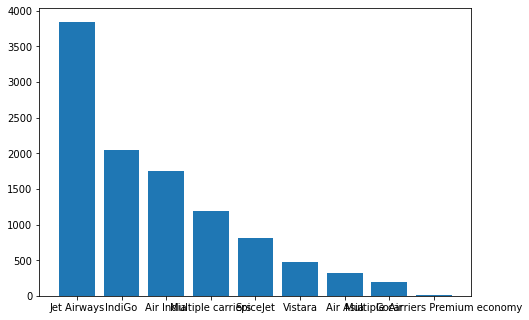

In [62]:
# Visualize what did
AL  = df['Airline'].value_counts()
AL = AL[:9,]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AL.index,AL.values)
plt.show()

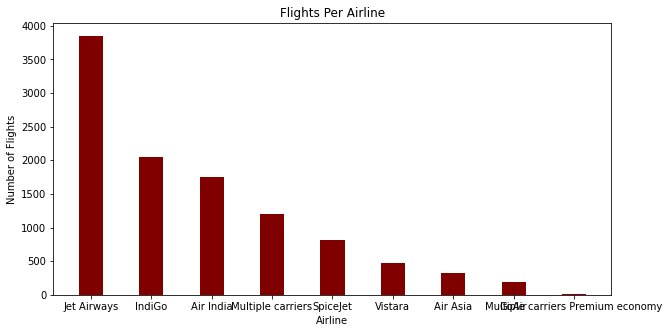

In [61]:
fig = plt.figure(figsize = (10, 5))
AL  = df['Airline'].value_counts()
AL = AL[:9,]
# creating the bar plot
plt.bar(AL.index, AL.values, color ='maroon',
        width = 0.4)
 
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Flights Per Airline')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


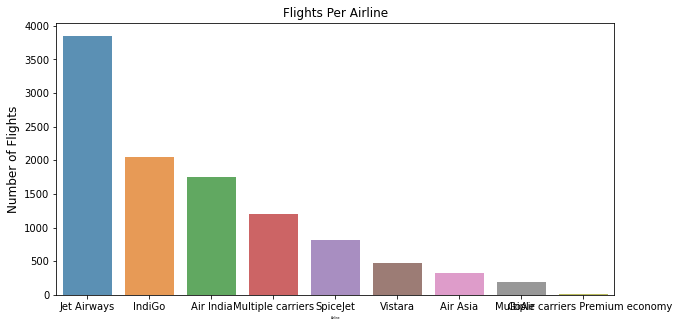

In [60]:
AL  = df['Airline'].value_counts()
AL = AL[:9,]
plt.figure(figsize=(10,5))
sns.barplot(AL.index, AL.values, alpha=0.8)
plt.title('Flights Per Airline')
plt.ylabel('Number of Flights', fontsize=12)
plt.xlabel('Airline', fontsize=3)
plt.show()